# 미국 의대생의 입학 관련 데이터

- Acceptance: 0이면 불합격, 1이면 합격
- BCPM: Bio/Chem/Physics/Math 과목의 학점 평균
- GPA: 전체과목 학점 평균
- VR: MCAT Verbal reasoning 과목 점수
- PS: MCAT Physical sciences 과목 점수
- WS: MCAT Writing sample 과목 점수
- BS: MCAT Biological sciences 과목 점수
- MCAT: MCAT 총점(=VR+PS+WS+BS)
- Apps: 의대 지원 횟수

In [1]:
import statsmodels.api as sm

data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


학점(GPA)과 합격여부와의 관계

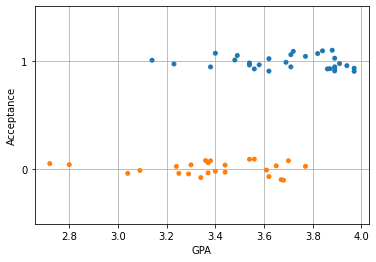

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.stripplot(x="GPA", y="Acceptance", data=df_med,
              jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [3]:
#로지스틱 회귀분석 실시. MCAT를 제외한 변수들을 넣어줌

model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Tue, 03 Aug 2021   Pseudo R-squ.:                  0.5913
Time:                        00:12:42   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

p-value를 기준으로 유의미 하지 않은 변수를 제외하기로 함. BCPM, VR, Apps.

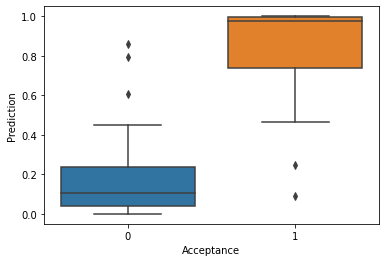

In [4]:
df_med["Prediction"] = result_med.predict(df_med)
sns.boxplot(x="Acceptance", y="Prediction", data=df_med)
plt.show()

실제값과 예측결과를 비교한 결과

유의하지 않은 점수를 제외하고 다시 로지스틱 회귀분석 시행.

In [10]:
model_med = sm.Logit.from_formula("Acceptance ~ Sex +  GPA + PS + WS + BS", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.290013
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       48
Method:                           MLE   Df Model:                            5
Date:                Tue, 03 Aug 2021   Pseudo R-squ.:                  0.5778
Time:                        00:18:48   Log-Likelihood:                -15.661
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 3.925e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.4709     12.215     -3.231      0.001     -63.411     -15.531
Sex[T.M]      -2.8403      1.

이 모델을 최종 모델로 선택한다면, 나머지 변수를 모두 고정 시킨 상태에서 하나의 변수를 1만큼 증가시켰을 때의 변화를 확인
예를들어 PS가 1 증가하면 합격할 확률(odds)이 exp(1.0248) = 2.79배 증가

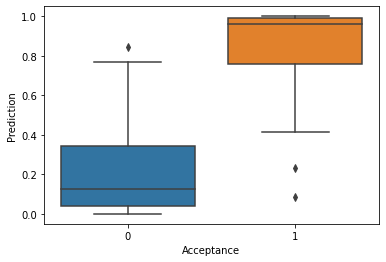

In [11]:
df_med["Prediction"] = result_med.predict(df_med)
sns.boxplot(x="Acceptance", y="Prediction", data=df_med)
plt.show()